In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
games_players_df = pd.read_csv("data/games_by_players.csv", low_memory=False)
games_teams_df = pd.read_csv("data/games_by_teams.csv")
matches_players_df = pd.read_csv("data/matches_by_players.csv")

In [4]:
vc = matches_players_df["player_id"].value_counts()
filter_vc = vc[vc > 6]

games_players_df = games_players_df[games_players_df["player_id"].isin(filter_vc.keys())]

vc = games_players_df["game_id"].value_counts()
filter_vc = vc[vc==6]

games_players_df = games_players_df[games_players_df["game_id"].isin(filter_vc.keys())]
games_players_df.dropna(inplace=True)

In [5]:
oce_games = games_players_df[games_players_df["team_region"] == "Oceania"]
eu_games = games_players_df[games_players_df["team_region"] == "Europe"]
na_games = games_players_df[games_players_df["team_region"] == "North America"]
mena_games = games_players_df[games_players_df["team_region"] == "Middle East & North Africa"]
sam_games = games_players_df[games_players_df["team_region"] == "South America"]

In [6]:
grouped_games = games_players_df.groupby("team_region")

In [115]:
grouped_games[["core_shooting_percentage"]].mean().loc[["Europe", "North America","Oceania","Middle East & North Africa","South America"]]

,core_shooting_percentage
team_region,
Europe,21.706096
North America,21.838158
Oceania,24.566572
Middle East & North Africa,24.328048
South America,23.051994


In [117]:
region_stats = grouped_games[["movement_avg_speed","positioning_avg_distance_to_ball","movement_percent_ground","boost_amount_stolen", "demo_inflicted", "boost_bpm","core_score","positioning_percent_behind_ball"]].mean()
#set_region_stats = region_stats[region_stats["team_region"].isin(["Europe", "North America", "Oceania","South America","Middle East & North Africa"])]
region_stats = region_stats.loc[["Europe", "North America","Oceania","Middle East & North Africa","South America"]]
region_stats

,movement_avg_speed,positioning_avg_distance_to_ball,movement_percent_ground,boost_amount_stolen,demo_inflicted,boost_bpm,core_score,positioning_percent_behind_ball
team_region,,,,,,,,
Europe,1545.439831,2861.373866,55.767083,556.884514,1.064579,410.077054,376.653604,72.699431
North America,1553.294847,2914.255590,56.229070,567.421742,1.170843,414.996723,371.419301,72.503067
Oceania,1551.249790,2967.447355,56.332324,552.053820,1.033249,409.013098,362.331402,71.662616
Middle East & North Africa,1577.346752,2806.995197,54.779922,532.260865,1.119167,421.635293,371.177379,72.394144
South America,1547.787973,2898.003398,55.903943,538.036156,1.117814,408.248466,368.637874,72.133796


In [8]:
region_boost_stats = grouped_games[["boost_bpm", "boost_bcpm", "boost_amount_stolen"]].mean()
region_boost_stats = region_boost_stats.loc[["Europe", "North America","Oceania","Middle East & North Africa","South America"]]
region_boost_stats

,boost_bpm,boost_bcpm,boost_amount_stolen
team_region,,,
Europe,410.077054,419.968047,556.884514
North America,414.996723,424.387906,567.421742
Oceania,409.013098,420.681599,552.053820
Middle East & North Africa,421.635293,431.753097,532.260865
South America,408.248466,420.307478,538.036156


In [9]:
region_movement_stats = grouped_games[["movement_percent_ground", "movement_percent_low_air", "movement_percent_high_air"]].mean()
region_movement_stats = region_movement_stats.loc[["Europe", "North America","Oceania","Middle East & North Africa","South America"]]
region_movement_stats

,movement_percent_ground,movement_percent_low_air,movement_percent_high_air
team_region,,,
Europe,55.767083,37.632473,6.600444
North America,56.229070,37.341063,6.429866
Oceania,56.332324,37.625102,6.042574
Middle East & North Africa,54.779922,39.100842,6.119236
South America,55.903943,37.640274,6.455784


In [10]:
region_positioning_stats = grouped_games[["positioning_avg_distance_to_ball_no_possession", "positioning_avg_distance_to_ball_possession", "positioning_avg_distance_to_mates"]].mean()
region_positioning_stats = region_positioning_stats.loc[["Europe", "North America","Oceania","Middle East & North Africa","South America"]]
region_positioning_stats

,positioning_avg_distance_to_ball_no_possession,positioning_avg_distance_to_ball_possession,positioning_avg_distance_to_mates
team_region,,,
Europe,2956.068233,2759.713710,3670.756237
North America,3024.892637,2797.212285,3779.097854
Oceania,3077.893451,2851.234005,3837.732578
Middle East & North Africa,2899.154849,2706.006404,3582.067017
South America,3002.737185,2786.448881,3705.887001


In [11]:
region_core_stats = grouped_games[["core_shots","core_saves","core_goals","core_assists"]].mean()
region_core_stats = region_core_stats.loc[["Europe", "North America","Oceania","Middle East & North Africa","South America"]]
region_core_stats

,core_shots,core_saves,core_goals,core_assists
team_region,,,,
Europe,2.819241,1.691973,0.633506,0.506930
North America,2.753791,1.676754,0.626960,0.495695
Oceania,2.660873,1.503778,0.689421,0.530059
Middle East & North Africa,2.761208,1.596752,0.712603,0.554552
South America,2.709336,1.583971,0.671198,0.527424


In [12]:
import pandas as pd
from sklearn import preprocessing

def minmax_df(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_minmax = pd.DataFrame(x_scaled)
    return df_minmax.to_numpy()

In [69]:
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    
    class RadarTransform(PolarAxes.PolarTransform):
        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [109]:
def plot_radar(df, title):
    N = len(df.columns)
    theta = radar_factory(N, frame='polygon')
    
    spoke_labels = list(df.columns)
    case_data = minmax_df(df)
    
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(top=0.85, bottom=0.05)
    
    ax.set_rgrids([0,0.25,0.5,1])
    #ax.set_rgrids([])
    ax.set_title(title,  position=(0.5, 1.1), ha='center')
    
    for i, d in enumerate(case_data):
        line = ax.plot(theta, d, label=df.index[i])
        ax.fill(theta, d,  alpha=0.25)
    ax.set_varlabels(spoke_labels)
    plt.legend(loc="lower center")
    
    plt.show()

Index(['Europe', 'North America', 'Oceania', 'Middle East & North Africa',
       'South America'],
      dtype='object', name='team_region')


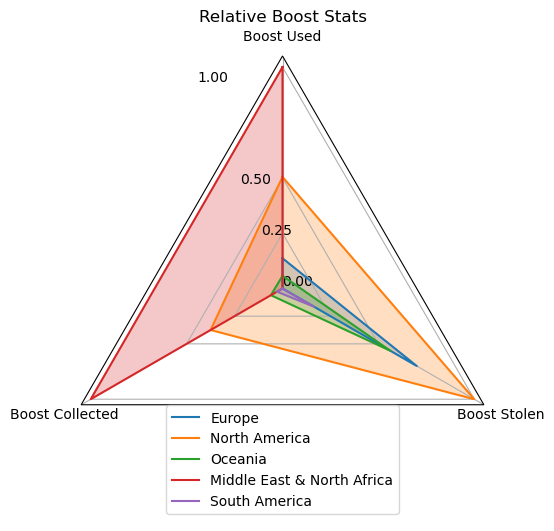

In [118]:
print(region_boost_stats.index)
region_boost_stats = region_boost_stats.rename(columns={"boost_bpm": "Boost Used", "boost_bcpm": "Boost Collected", "boost_amount_stolen": "Boost Stolen"})
plot_radar(region_boost_stats, "Relative Boost Stats")

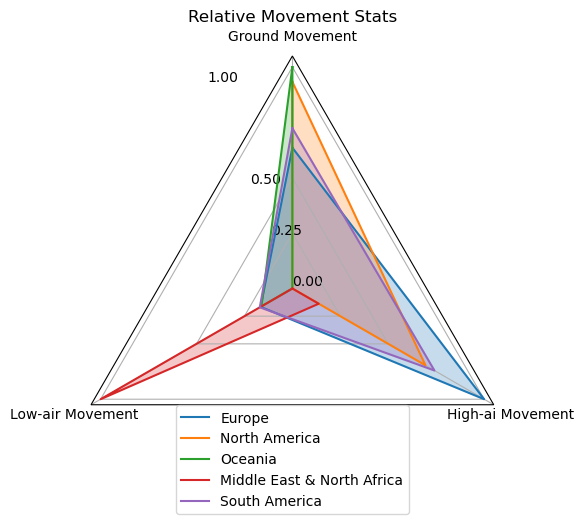

In [104]:
region_movement_stats = region_movement_stats.rename(columns={"movement_percent_ground":"Ground Movement", "movement_percent_low_air":"Low-air Movement", "movement_percent_high_air":"High-ai Movement"})
plot_radar(region_movement_stats, "Relative Movement Stats")

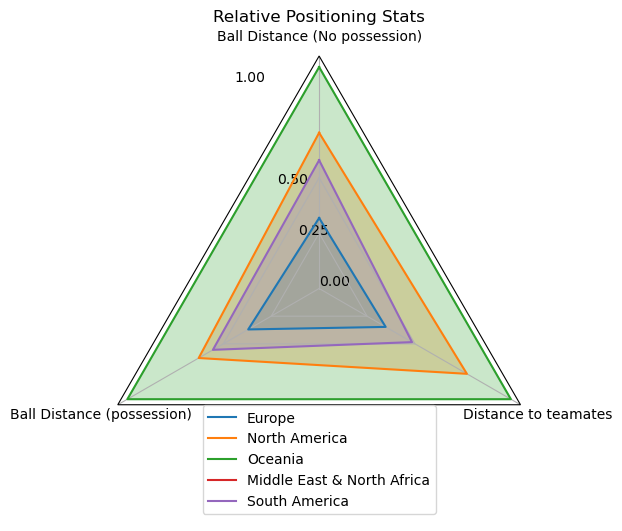

In [105]:
region_positioning_stats = region_positioning_stats.rename(columns={"positioning_avg_distance_to_ball_possession":"Ball Distance (possession)", "positioning_avg_distance_to_ball_no_possession":"Ball Distance (No possession)", "positioning_avg_distance_to_mates":"Distance to teamates"})
plot_radar(region_positioning_stats, "Relative Positioning Stats")

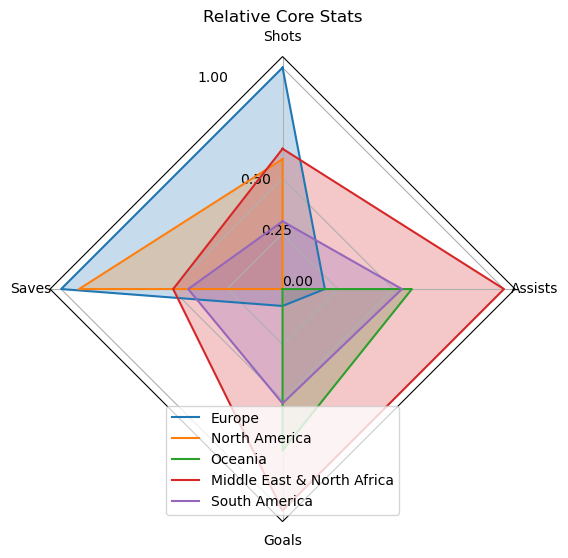

In [111]:
region_core_stats = region_core_stats.rename(columns={"core_shots":"Shots", "core_saves":"Saves", "core_goals":"Goals", "core_assists":"Assists"})
plot_radar(region_core_stats, "Relative Core Stats")

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

gtdf = games_teams_df
list(gtdf.columns)

features = [
 'ball_possession_time',
 'ball_time_in_side',
 'core_shots',
 'core_goals',
 'core_saves',
 'core_assists',
 'core_score',
 'core_shooting_percentage',
 'boost_bpm',
 'boost_bcpm',
 'boost_avg_amount',
 'boost_amount_collected',
 'boost_amount_stolen',
 'boost_amount_collected_big',
 'boost_amount_stolen_big',
 'boost_amount_collected_small',
 'boost_amount_stolen_small',
 'boost_count_collected_big',
 'boost_count_stolen_big',
 'boost_count_collected_small',
 'boost_count_stolen_small',
 'boost_amount_overfill',
 'boost_amount_overfill_stolen',
 'boost_amount_used_while_supersonic',
 'boost_time_zero_boost',
 'boost_time_full_boost',
 'boost_time_boost_0_25',
 'boost_time_boost_25_50',
 'boost_time_boost_50_75',
 'boost_time_boost_75_100',
 'movement_total_distance',
 'movement_time_supersonic_speed',
 'movement_time_boost_speed',
 'movement_time_slow_speed',
 'movement_time_ground',
 'movement_time_low_air',
 'movement_time_high_air',
 'movement_time_powerslide',
 'movement_count_powerslide',
 'positioning_time_defensive_third',
 'positioning_time_neutral_third',
 'positioning_time_offensive_third',
 'positioning_time_defensive_half',
 'positioning_time_offensive_half',
 'positioning_time_behind_ball',
 'positioning_time_in_front_ball',
 'demo_inflicted',
 'demo_taken',
 'winner']

features2 = [
 'ball_possession_time',
 'ball_time_in_side',
 'core_saves',
 'boost_bpm',
 'boost_bcpm',
 'boost_avg_amount',
 'boost_amount_collected',
 'boost_amount_stolen',
 'boost_amount_collected_big',
 'boost_amount_stolen_big',
 'boost_amount_collected_small',
 'boost_amount_stolen_small',
 'boost_count_collected_big',
 'boost_count_stolen_big',
 'boost_count_collected_small',
 'boost_count_stolen_small',
 'boost_amount_overfill',
 'boost_amount_overfill_stolen',
 'boost_amount_used_while_supersonic',
 'boost_time_zero_boost',
 'boost_time_full_boost',
 'boost_time_boost_0_25',
 'boost_time_boost_25_50',
 'boost_time_boost_50_75',
 'boost_time_boost_75_100',
 'movement_total_distance',
 'movement_time_supersonic_speed',
 'movement_time_boost_speed',
 'movement_time_slow_speed',
 'movement_time_ground',
 'movement_time_low_air',
 'movement_time_high_air',
 'movement_time_powerslide',
 'movement_count_powerslide',
 'positioning_time_defensive_third',
 'positioning_time_neutral_third',
 'positioning_time_offensive_third',
 'positioning_time_defensive_half',
 'positioning_time_offensive_half',
 'positioning_time_behind_ball',
 'positioning_time_in_front_ball',
 'demo_inflicted',
 'demo_taken',
 'winner']

print(len(features))
df = gtdf[features].dropna()
print(len(gtdf), len(df))
y = df["winner"]
x = df[features[:-1]]

classifier = SelectKBest(f_classif, k=6).fit(x, y)
x_new = classifier.get_feature_names_out()
print(x_new)

reg_big = LogisticRegression(max_iter=1000).fit(x,y)
print(accuracy_score(y, reg_big.predict(x)))

for k in range(1,15):
    classifier = SelectKBest(f_classif, k=k).fit(x, y)
    x_new = classifier.get_feature_names_out()
    reg_small = LogisticRegression(max_iter=5000).fit(df[x_new],y)
    print(k+1, accuracy_score(y, reg_small.predict(df[x_new])))

reg_impos = LogisticRegression(max_iter=1000).fit(df[["demo_inflicted","demo_taken"]],y)
print(accuracy_score(y, reg_impos.predict(df[["demo_inflicted","demo_taken"]])))

49
35594 34998
['core_shots' 'core_goals' 'core_assists' 'core_score'
 'core_shooting_percentage' 'positioning_time_in_front_ball']
0.8563632207554718
2 0.7906451797245557
3 0.7906451797245557
4 0.7897308417623864
5 0.7974455683181896
6 0.7950168581061775
7 0.8633350477170124
8 0.8639350820046859
9 0.8656494656837533
10 0.8919366820961198
11 0.894079661694954
12 0.9046231213212184
13 0.9032516143779644
14 0.9049945711183496
15 0.9093948225612892
0.5312589290816618


In [150]:
from sklearn.naive_bayes import GaussianNB

gnb_big = GaussianNB().fit(x,y)
print(accuracy_score(y, gnb_big.predict(x)))

gnb_small = GaussianNB().fit(df[x_new],y)
print(accuracy_score(y, gnb_small.predict(df[x_new])))

0.6572661294931139
0.7176981541802389


In [148]:
df.corr()["winner"][df.corr()["winner"].abs() > 0.1]

ball_time_in_side                  -0.193496
core_shots                          0.375991
core_goals                          0.620329
core_assists                        0.550464
core_score                          0.481197
core_shooting_percentage            0.460050
boost_avg_amount                    0.153390
boost_count_stolen_big              0.108063
boost_amount_overfill_stolen        0.121932
boost_time_zero_boost              -0.108358
boost_time_full_boost               0.123245
boost_time_boost_75_100             0.111403
positioning_time_defensive_third   -0.120804
positioning_time_offensive_third    0.156208
positioning_time_offensive_half     0.144853
positioning_time_behind_ball        0.164827
positioning_time_in_front_ball     -0.370953
winner                              1.000000
Name: winner, dtype: float64

In [21]:
temp = [1,2,3]
print(temp[:3])

[1, 2, 3]


In [155]:
# Assume player plays for one team s.t. their positioning split is representative of team approach and game win % match team win %
# Construct new df with player id, name, first, second, third man count, wins, losses by going over games grouped over game id+team id


team_game_groups = games_players_df.groupby(["game_id","team_id"])

new_data = {"player_id":[], "player_tag":[], "first": [], "second": [], "third": [], "wins": [], "losses":[]}
player_index = {}
current_index = 0
for name, group in team_game_groups:
    for index, row in group.iterrows():
        if row["player_id"] not in player_index:
            player_index[row["player_id"]] = current_index
            new_data["player_id"].append(row["player_id"])
            new_data["player_tag"].append(row["player_tag"])
            new_data["first"].append(0)
            new_data["second"].append(0)
            new_data["third"].append(0)
            new_data["wins"].append(0)
            new_data["losses"].append(0)
            current_index += 1

        if row["winner"]:
            new_data["wins"][player_index[row["player_id"]]] += 1
        else:
            new_data["losses"][player_index[row["player_id"]]] += 1

    #first_id = games_players_df.iloc[[group["positioning_percent_most_forward"].idxmax()]]["player_id"]
    first_id = group[group.positioning_percent_most_forward == group.positioning_percent_most_forward.max()]["player_id"]
    #third_id = games_players_df.iloc[[group["positioning_percent_most_back"].idxmax()]]["player_id"]
    third_id = group[group.positioning_percent_most_back == group.positioning_percent_most_back.max()]["player_id"]

    fid_val = first_id.tolist()[0]

    tid_val = third_id.tolist()[0]
    # Player can be first and third man, with two second mans
    ids = group["player_id"].tolist()
    
    ids.remove(fid_val)
    if tid_val != fid_val:
        ids.remove(tid_val)

    new_data["first"][player_index[fid_val]] += 1
    new_data["third"][player_index[tid_val]] += 1
    
    for sid_val in ids:
        new_data["second"][player_index[sid_val]] += 1


In [157]:
roles_df = pd.DataFrame(data=new_data)
roles_df.head()

,player_id,player_tag,first,second,third,wins,losses
0,5f3d8fdd95f40596eae2412e,Amphis,118,93,71,176,94
1,5f3d8fdd95f40596eae23e01,Torsos,102,130,44,176,94
2,5f3d8fdd95f40596eae23e53,Express,50,73,155,176,94
3,604e562901d675f81a96b270,mel kin,42,41,22,48,57
4,5f7ca648ea8a0f0714fb9a20,Laxin,34,13,44,39,44


In [159]:
def first_percent(row):
    return row["first"] / (row["first"] + row["second"] + row["third"])

def second_percent(row):
    return row["second"] / (row["first"] + row["second"] + row["third"])

def third_percent(row):
    return row["third"] / (row["first"] + row["second"] + row["third"])

def win_percent(row):
    return row["wins"] / (row["wins"] + row["losses"])
    
roles_df["first_percent"] = roles_df.apply(first_percent, axis=1)
roles_df["second_percent"] = roles_df.apply(second_percent, axis=1)
roles_df["third_percent"] = roles_df.apply(third_percent, axis=1)
roles_df["win_percent"] = roles_df.apply(win_percent, axis=1)

roles_df

,player_id,player_tag,first,second,third,wins,losses,first_percent,second_percent,third_percent,win_percent
0,5f3d8fdd95f40596eae2412e,Amphis,118,93,71,176,94,0.418440,0.329787,0.251773,0.651852
1,5f3d8fdd95f40596eae23e01,Torsos,102,130,44,176,94,0.369565,0.471014,0.159420,0.651852
2,5f3d8fdd95f40596eae23e53,Express,50,73,155,176,94,0.179856,0.262590,0.557554,0.651852
3,604e562901d675f81a96b270,mel kin,42,41,22,48,57,0.400000,0.390476,0.209524,0.457143
4,5f7ca648ea8a0f0714fb9a20,Laxin,34,13,44,39,44,0.373626,0.142857,0.483516,0.469880
...,...,...,...,...,...,...,...,...,...,...,...
741,6266da5dda9d7ca1c7bacf5b,King.,6,6,9,10,10,0.285714,0.285714,0.428571,0.500000
742,627b91fada9d7ca1c7baeaf2,ALeon,12,6,3,8,12,0.571429,0.285714,0.142857,0.400000
743,620a7f4ada9d7ca1c7ba84b8,Kylo,1,2,0,0,3,0.333333,0.666667,0.000000,0.000000
744,616da9ecf8090ec7452886b7,Fettic,1,1,19,10,10,0.047619,0.047619,0.904762,0.500000


In [179]:
def uniformity(row):
    diff1 = abs(row["first_percent"] - row["second_percent"])
    diff2 = abs(row["first_percent"] - row["third_percent"])
    diff3 = abs(row["second_percent"] - row["third_percent"])
    return 1 - max([diff1, diff2, diff3])

roles_df["uniformity"] = roles_df.apply(uniformity, axis=1)
roles_df

,player_id,player_tag,first,second,third,wins,losses,first_percent,second_percent,third_percent,win_percent,uniformity
0,5f3d8fdd95f40596eae2412e,Amphis,118,93,71,176,94,0.418440,0.329787,0.251773,0.651852,0.833333
1,5f3d8fdd95f40596eae23e01,Torsos,102,130,44,176,94,0.369565,0.471014,0.159420,0.651852,0.688406
2,5f3d8fdd95f40596eae23e53,Express,50,73,155,176,94,0.179856,0.262590,0.557554,0.651852,0.622302
3,604e562901d675f81a96b270,mel kin,42,41,22,48,57,0.400000,0.390476,0.209524,0.457143,0.809524
4,5f7ca648ea8a0f0714fb9a20,Laxin,34,13,44,39,44,0.373626,0.142857,0.483516,0.469880,0.659341
...,...,...,...,...,...,...,...,...,...,...,...,...
741,6266da5dda9d7ca1c7bacf5b,King.,6,6,9,10,10,0.285714,0.285714,0.428571,0.500000,0.857143
742,627b91fada9d7ca1c7baeaf2,ALeon,12,6,3,8,12,0.571429,0.285714,0.142857,0.400000,0.571429
743,620a7f4ada9d7ca1c7ba84b8,Kylo,1,2,0,0,3,0.333333,0.666667,0.000000,0.000000,0.333333
744,616da9ecf8090ec7452886b7,Fettic,1,1,19,10,10,0.047619,0.047619,0.904762,0.500000,0.142857


In [180]:
roles_df[['first', 'second', 'third', 'wins', 'losses','first_percent', 'second_percent', 'third_percent', 'win_percent','uniformity']].mean()

first             40.296247
second            43.536193
third             40.296247
wins              60.446381
losses            60.439678
first_percent      0.322144
second_percent     0.353227
third_percent      0.324628
win_percent        0.436645
uniformity         0.695983
dtype: float64

<Axes: title={'center': 'Uniformity Distribution'}, ylabel='Frequency'>

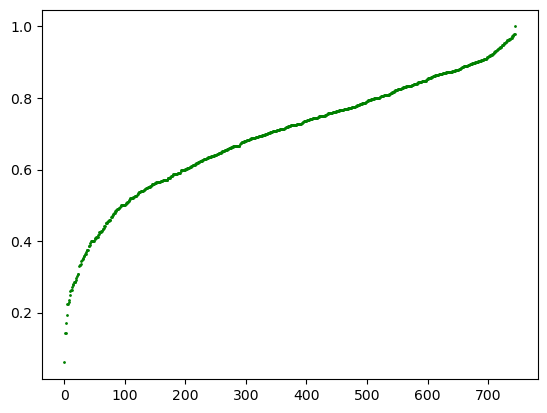

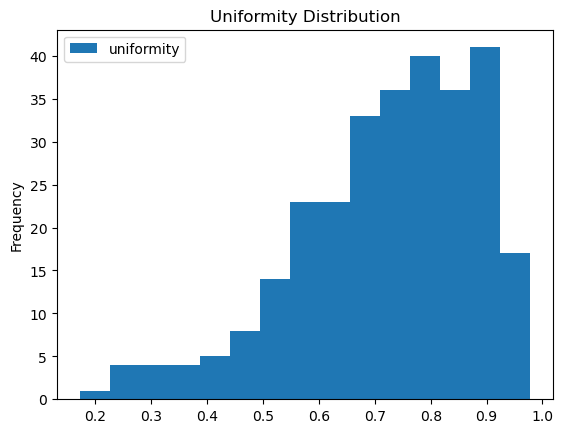

In [199]:
sorted = roles_df.sort_values("uniformity", axis=0)

x = [i for i in range(len(sorted))]
y = sorted["uniformity"]

plt.scatter(x, y,color='g',s=1)
filtered_roles[["uniformity"]].plot.hist(bins=15, title="Uniformity Distribution")

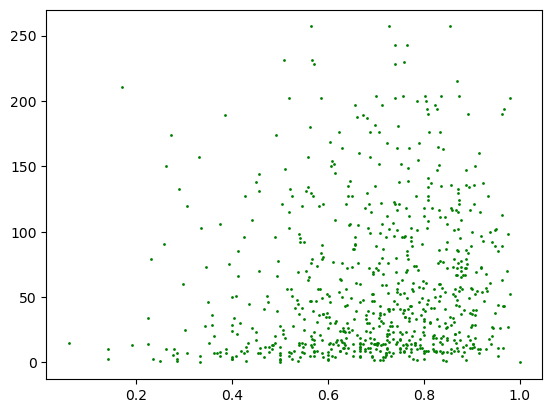

In [163]:
x = roles_df["uniformity"]
y = roles_df["wins"]

plt.scatter(x, y,color='g',s=1)

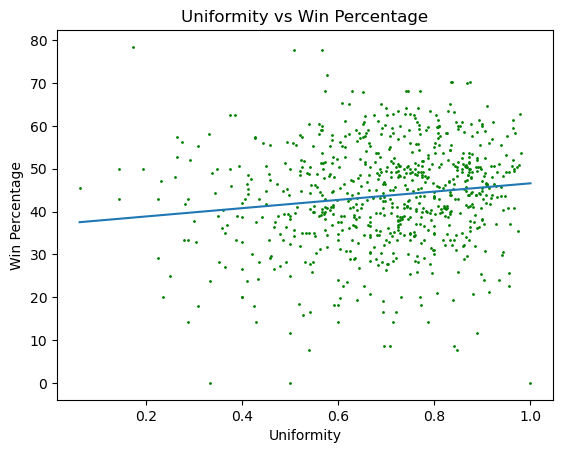

In [218]:
x = roles_df["uniformity"]
y = roles_df["win_percent"] * 100



plt.xlabel("Uniformity")
plt.ylabel("Win Percentage")
plt.title("Uniformity vs Win Percentage")
plt.scatter(x, y,color='g',s=1)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

In [49]:
roles_df[["uniformity","wins", "win_percent"]].corr()

,uniformity,wins,win_percent
uniformity,1.000000,0.119120,0.135226
wins,0.119120,1.000000,0.752105
win_percent,0.135226,0.752105,1.000000


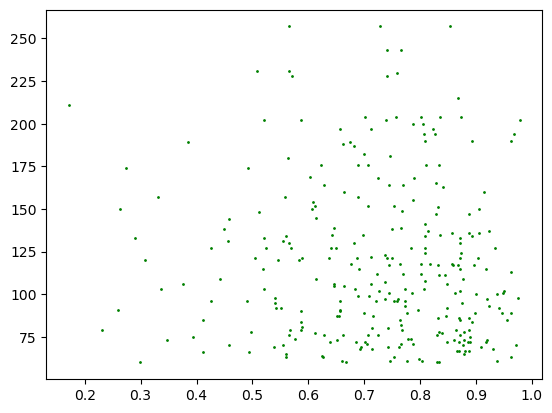

In [172]:
filtered_roles = roles_df[(roles_df["wins"] >= 60)]

x = filtered_roles["uniformity"]
y = filtered_roles["wins"]

plt.scatter(x, y,color='g',s=1)

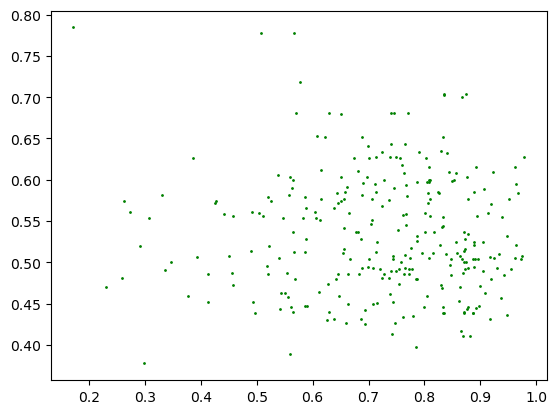

In [173]:
x = filtered_roles["uniformity"]
y = filtered_roles["win_percent"]

plt.scatter(x, y,color='g',s=1)

In [174]:
filtered_roles[filtered_roles["player_tag"] == "oKhaliD"]

,player_id,player_tag,first,second,third,wins,losses,first_percent,second_percent,third_percent,win_percent,uniformity
172,5f3d8fdd95f40596eae23f95,oKhaliD,8,31,235,211,58,0.029197,0.113139,0.857664,0.784387,0.171533


In [175]:
filtered_roles[["uniformity","wins","win_percent"]].corr()

,uniformity,wins,win_percent
uniformity,1.000000,-0.067637,-0.051819
wins,-0.067637,1.000000,0.739811
win_percent,-0.051819,0.739811,1.000000


In [79]:
filtered_roles[filtered_roles["player_tag"] == "Seikoo"]

,player_id,player_tag,first,second,third,wins,losses,first_percent,second_percent,third_percent,uniformity,win_percent
404,5fd40fc10e831f1d52bd96a5,Seikoo,166,107,55,188,130,0.506098,0.32622,0.167683,0.661585,0.591195


In [205]:
filtered_roles[filtered_roles["player_tag"] == "M0nkey M00n"]

,player_id,player_tag,first,second,third,wins,losses,first_percent,second_percent,third_percent,win_percent,uniformity
302,5f3d8fdd95f40596eae240d2,M0nkey M00n,60,145,121,202,120,0.184049,0.444785,0.371166,0.627329,0.739264


In [206]:
filtered_roles[filtered_roles["player_tag"] == "Extra"]

,player_id,player_tag,first,second,third,wins,losses,first_percent,second_percent,third_percent,win_percent,uniformity
304,5f3d8fdd95f40596eae23fb9,Extra,105,110,112,202,120,0.321101,0.336391,0.342508,0.627329,0.978593


In [208]:
filtered_roles[filtered_roles["player_tag"] == "rise."]

,player_id,player_tag,first,second,third,wins,losses,first_percent,second_percent,third_percent,win_percent,uniformity
407,5f3d8fdd95f40596eae23f9e,rise.,215,190,27,257,172,0.497685,0.439815,0.0625,0.599068,0.564815


In [210]:
filtered_roles[filtered_roles["player_tag"] == "Joyo"]

,player_id,player_tag,first,second,third,wins,losses,first_percent,second_percent,third_percent,win_percent,uniformity
408,5f3d8fdd95f40596eae24232,Joyo,85,153,206,257,172,0.191441,0.344595,0.463964,0.599068,0.727477


In [211]:
filtered_roles[filtered_roles["player_tag"] == "Vatira"]

,player_id,player_tag,first,second,third,wins,losses,first_percent,second_percent,third_percent,win_percent,uniformity
409,5faeab91e9ce4ed313ea9570,Vatira,129,133,196,257,172,0.281659,0.290393,0.427948,0.599068,0.853712


In [212]:
filtered_roles[filtered_roles["player_tag"] == "JKnaps"]

,player_id,player_tag,first,second,third,wins,losses,first_percent,second_percent,third_percent,win_percent,uniformity
48,5f3d8fdd95f40596eae23d8f,JKnaps,71,141,170,243,135,0.185864,0.36911,0.445026,0.642857,0.740838


In [213]:
filtered_roles[filtered_roles["player_tag"] == "Atomic"]

,player_id,player_tag,first,second,third,wins,losses,first_percent,second_percent,third_percent,win_percent,uniformity
212,5f3d8fdd95f40596eae23fe6,Atomic,171,138,78,230,142,0.44186,0.356589,0.20155,0.61828,0.75969


In [214]:
filtered_roles[filtered_roles["player_tag"] == "Chicago"]

,player_id,player_tag,first,second,third,wins,losses,first_percent,second_percent,third_percent,win_percent,uniformity
49,5f3d8fdd95f40596eae23dba,Chicago,162,155,71,243,135,0.417526,0.399485,0.18299,0.642857,0.765464


In [181]:
filtered_roles["uniformity"].mean()

0.7213820450643161

In [219]:
len(filtered_roles)

289